# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [220]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import sys
sys.path.append(os.path.join("../../"))

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#To determine date from unix format

from datetime import datetime


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [167]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [168]:
import json
from api_keys import weather_api_key
city_name = cities
units = "imperial"

city_data = []
print("City Weather Data Retrieveing \n-----------------------------\n-----------------------------")
for j, cities in enumerate(city_name):
   
    url =  f'http://api.openweathermap.org/data/2.5/weather?q={cities}&appid={weather_api_key}&units={units}'
    print(f'Find [{j+1}] {cities} | {url}')
 
    try:
        # call weather API
        response = requests.get(url)
        weather_json = response.json()
        
        #Parse for lat, lng, temperature, humidity, cloudiness, windspeed, date, and country
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_temp = weather_json['main']['temp_max']
        city_humid = weather_json['main']['humidity']
        city_cloud = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_date = weather_json['dt']
        city_country = weather_json['sys']['country']
        print(f'[{j+1}] {cities} | City Data found...processing')
        
        city_data.append({'City': cities,\
                     'Country': city_country,\
                      'lat': city_lat,\
                     'lng':city_lng,\
                     'Max Temperature ⁰F': city_temp,\
                     'Humidity':city_humid,\
                     'Cloudiness': city_cloud,\
                     'Wind speed': city_wind,\
                     'Date': city_date})
        
    except:
            print(f'[{j+1}] {cities} | can not be found... skipping')
        
    j += 1
print("------------------------------------------------")    
print('City Weather Data Retrieveing Process Completed')
print(f'{len(city_data)} x city data records were retrieved')
print("------------------------------------------------")
    
    


City Weather Data Retrieveing 
-----------------------------
-----------------------------
Find [1] san rafael | http://api.openweathermap.org/data/2.5/weather?q=san rafael&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[1] san rafael | City Data found...processing
Find [2] xinxiang | http://api.openweathermap.org/data/2.5/weather?q=xinxiang&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[2] xinxiang | City Data found...processing
Find [3] isangel | http://api.openweathermap.org/data/2.5/weather?q=isangel&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[3] isangel | City Data found...processing
Find [4] hermanus | http://api.openweathermap.org/data/2.5/weather?q=hermanus&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[4] hermanus | City Data found...processing
Find [5] albany | http://api.openweathermap.org/data/2.5/weather?q=albany&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[5] albany | City Data found...processing
Find [6] sungai padi | http://ap

[48] takaka | City Data found...processing
Find [49] bolungarvik | http://api.openweathermap.org/data/2.5/weather?q=bolungarvik&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[49] bolungarvik | can not be found... skipping
Find [50] butaritari | http://api.openweathermap.org/data/2.5/weather?q=butaritari&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[50] butaritari | City Data found...processing
Find [51] the valley | http://api.openweathermap.org/data/2.5/weather?q=the valley&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[51] the valley | City Data found...processing
Find [52] kandrian | http://api.openweathermap.org/data/2.5/weather?q=kandrian&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[52] kandrian | City Data found...processing
Find [53] mahebourg | http://api.openweathermap.org/data/2.5/weather?q=mahebourg&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[53] mahebourg | City Data found...processing
Find [54] punta arenas | http://api.openwea

[94] silca | City Data found...processing
Find [95] bredasdorp | http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[95] bredasdorp | City Data found...processing
Find [96] katsuura | http://api.openweathermap.org/data/2.5/weather?q=katsuura&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[96] katsuura | City Data found...processing
Find [97] bengkulu | http://api.openweathermap.org/data/2.5/weather?q=bengkulu&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[97] bengkulu | City Data found...processing
Find [98] kahului | http://api.openweathermap.org/data/2.5/weather?q=kahului&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[98] kahului | City Data found...processing
Find [99] sao paulo de olivenca | http://api.openweathermap.org/data/2.5/weather?q=sao paulo de olivenca&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[99] sao paulo de olivenca | City Data found...processing
Find [100] dukat | http://

[139] fort saint john | can not be found... skipping
Find [140] mbanza-ngungu | http://api.openweathermap.org/data/2.5/weather?q=mbanza-ngungu&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[140] mbanza-ngungu | City Data found...processing
Find [141] gat | http://api.openweathermap.org/data/2.5/weather?q=gat&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[141] gat | City Data found...processing
Find [142] ca mau | http://api.openweathermap.org/data/2.5/weather?q=ca mau&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[142] ca mau | City Data found...processing
Find [143] yangambi | http://api.openweathermap.org/data/2.5/weather?q=yangambi&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[143] yangambi | City Data found...processing
Find [144] sorland | http://api.openweathermap.org/data/2.5/weather?q=sorland&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[144] sorland | City Data found...processing
Find [145] dikson | http://api.openweathermap.org/data/2

[184] avarua | City Data found...processing
Find [185] qasigiannguit | http://api.openweathermap.org/data/2.5/weather?q=qasigiannguit&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[185] qasigiannguit | City Data found...processing
Find [186] leninsk | http://api.openweathermap.org/data/2.5/weather?q=leninsk&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[186] leninsk | City Data found...processing
Find [187] puerto escondido | http://api.openweathermap.org/data/2.5/weather?q=puerto escondido&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[187] puerto escondido | City Data found...processing
Find [188] mackenzie | http://api.openweathermap.org/data/2.5/weather?q=mackenzie&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[188] mackenzie | City Data found...processing
Find [189] lolua | http://api.openweathermap.org/data/2.5/weather?q=lolua&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[189] lolua | can not be found... skipping
Find [190] tsovak | http:/

[231] clyde river | City Data found...processing
Find [232] morehead | http://api.openweathermap.org/data/2.5/weather?q=morehead&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[232] morehead | City Data found...processing
Find [233] ewa beach | http://api.openweathermap.org/data/2.5/weather?q=ewa beach&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[233] ewa beach | City Data found...processing
Find [234] yatou | http://api.openweathermap.org/data/2.5/weather?q=yatou&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[234] yatou | City Data found...processing
Find [235] baruun-urt | http://api.openweathermap.org/data/2.5/weather?q=baruun-urt&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[235] baruun-urt | City Data found...processing
Find [236] lengshuitan | http://api.openweathermap.org/data/2.5/weather?q=lengshuitan&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[236] lengshuitan | City Data found...processing
Find [237] komsomolskiy | http://api.openw

[277] ust-nera | City Data found...processing
Find [278] chegutu | http://api.openweathermap.org/data/2.5/weather?q=chegutu&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[278] chegutu | City Data found...processing
Find [279] tessalit | http://api.openweathermap.org/data/2.5/weather?q=tessalit&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[279] tessalit | City Data found...processing
Find [280] fortuna | http://api.openweathermap.org/data/2.5/weather?q=fortuna&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[280] fortuna | City Data found...processing
Find [281] fort nelson | http://api.openweathermap.org/data/2.5/weather?q=fort nelson&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[281] fort nelson | City Data found...processing
Find [282] vardo | http://api.openweathermap.org/data/2.5/weather?q=vardo&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[282] vardo | City Data found...processing
Find [283] platanos | http://api.openweathermap.org/data/2.5

[324] vastervik | can not be found... skipping
Find [325] manaus | http://api.openweathermap.org/data/2.5/weather?q=manaus&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[325] manaus | City Data found...processing
Find [326] kipini | http://api.openweathermap.org/data/2.5/weather?q=kipini&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[326] kipini | City Data found...processing
Find [327] papparapatti | http://api.openweathermap.org/data/2.5/weather?q=papparapatti&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[327] papparapatti | can not be found... skipping
Find [328] fallon | http://api.openweathermap.org/data/2.5/weather?q=fallon&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[328] fallon | City Data found...processing
Find [329] ternate | http://api.openweathermap.org/data/2.5/weather?q=ternate&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[329] ternate | City Data found...processing
Find [330] bindi | http://api.openweathermap.org/data/2.5/weat

[370] port hedland | City Data found...processing
Find [371] guerrero negro | http://api.openweathermap.org/data/2.5/weather?q=guerrero negro&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[371] guerrero negro | City Data found...processing
Find [372] sanmenxia | http://api.openweathermap.org/data/2.5/weather?q=sanmenxia&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[372] sanmenxia | City Data found...processing
Find [373] malvern | http://api.openweathermap.org/data/2.5/weather?q=malvern&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[373] malvern | City Data found...processing
Find [374] tommot | http://api.openweathermap.org/data/2.5/weather?q=tommot&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[374] tommot | City Data found...processing
Find [375] ostrovnoy | http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[375] ostrovnoy | City Data found...processing
Find [376] pangody | http://api.ope

[417] acapulco | City Data found...processing
Find [418] umm lajj | http://api.openweathermap.org/data/2.5/weather?q=umm lajj&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[418] umm lajj | City Data found...processing
Find [419] la ronge | http://api.openweathermap.org/data/2.5/weather?q=la ronge&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[419] la ronge | City Data found...processing
Find [420] pankovka | http://api.openweathermap.org/data/2.5/weather?q=pankovka&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[420] pankovka | City Data found...processing
Find [421] muravlenko | http://api.openweathermap.org/data/2.5/weather?q=muravlenko&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[421] muravlenko | City Data found...processing
Find [422] tsihombe | http://api.openweathermap.org/data/2.5/weather?q=tsihombe&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[422] tsihombe | can not be found... skipping
Find [423] kodiak | http://api.openweathermap.or

[464] yar-sale | City Data found...processing
Find [465] tarso | http://api.openweathermap.org/data/2.5/weather?q=tarso&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[465] tarso | City Data found...processing
Find [466] udachnyy | http://api.openweathermap.org/data/2.5/weather?q=udachnyy&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[466] udachnyy | City Data found...processing
Find [467] adrar | http://api.openweathermap.org/data/2.5/weather?q=adrar&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[467] adrar | City Data found...processing
Find [468] kysyl-syr | http://api.openweathermap.org/data/2.5/weather?q=kysyl-syr&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[468] kysyl-syr | City Data found...processing
Find [469] oistins | http://api.openweathermap.org/data/2.5/weather?q=oistins&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[469] oistins | City Data found...processing
Find [470] severo-kurilsk | http://api.openweathermap.org/data/2.5/weath

[512] bulaevo | City Data found...processing
Find [513] sindou | http://api.openweathermap.org/data/2.5/weather?q=sindou&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[513] sindou | City Data found...processing
Find [514] nuuk | http://api.openweathermap.org/data/2.5/weather?q=nuuk&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[514] nuuk | City Data found...processing
Find [515] odweyne | http://api.openweathermap.org/data/2.5/weather?q=odweyne&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[515] odweyne | City Data found...processing
Find [516] sao jose do campestre | http://api.openweathermap.org/data/2.5/weather?q=sao jose do campestre&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[516] sao jose do campestre | City Data found...processing
Find [517] verdalsora | http://api.openweathermap.org/data/2.5/weather?q=verdalsora&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[517] verdalsora | can not be found... skipping
Find [518] zhigalovo | http://a

[558] tilichiki | City Data found...processing
Find [559] santiago del estero | http://api.openweathermap.org/data/2.5/weather?q=santiago del estero&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[559] santiago del estero | City Data found...processing
Find [560] alta floresta | http://api.openweathermap.org/data/2.5/weather?q=alta floresta&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[560] alta floresta | City Data found...processing
Find [561] hargeysa | http://api.openweathermap.org/data/2.5/weather?q=hargeysa&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[561] hargeysa | City Data found...processing
Find [562] bengkalis | http://api.openweathermap.org/data/2.5/weather?q=bengkalis&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[562] bengkalis | can not be found... skipping
Find [563] andevoranto | http://api.openweathermap.org/data/2.5/weather?q=andevoranto&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[563] andevoranto | can not be found... sk

[606] andros | City Data found...processing
Find [607] chibuto | http://api.openweathermap.org/data/2.5/weather?q=chibuto&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[607] chibuto | City Data found...processing
Find [608] hovd | http://api.openweathermap.org/data/2.5/weather?q=hovd&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[608] hovd | City Data found...processing
Find [609] tautira | http://api.openweathermap.org/data/2.5/weather?q=tautira&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[609] tautira | City Data found...processing
Find [610] evenskjaer | http://api.openweathermap.org/data/2.5/weather?q=evenskjaer&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[610] evenskjaer | can not be found... skipping
Find [611] dobsina | http://api.openweathermap.org/data/2.5/weather?q=dobsina&appid=ed9ab2e28cee00874214ba2e2f1068a1&units=imperial
[611] dobsina | City Data found...processing
Find [612] rocha | http://api.openweathermap.org/data/2.5/weather?q=roc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [169]:
city_data_df = pd.DataFrame(city_data).set_index('City')
city_data_df.to_csv("../output_data/Cities_weather.csv")

In [180]:
city_df = pd.read_csv("../output_data/Cities_weather.csv")

city_df

,City,Country,lat,lng,Max Temperature ⁰F,Humidity,Cloudiness,Wind speed,Date
0,san rafael,AR,-34.62,-68.33,66.85,48,99,3.87,1605583836
1,xinxiang,CN,35.31,113.87,54.21,76,100,11.79,1605584047
2,isangel,VU,-19.55,169.27,82.40,74,20,5.82,1605584047
3,hermanus,ZA,-34.42,19.23,63.00,85,100,3.00,1605584047
4,albany,US,42.60,-73.97,41.00,68,47,5.57,1605583822
...,...,...,...,...,...,...,...,...,...
583,lasa,IT,46.62,10.70,37.99,69,5,3.36,1605584097
584,uddevalla,SE,58.35,11.94,52.00,93,82,11.41,1605584097
585,beloha,MG,-25.17,45.05,76.86,52,0,2.15,1605584097
586,ranir bazar,IN,23.83,91.37,77.00,78,0,1.99,1605584097


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [181]:
city_sts = city_df.describe()
city_sts

,lat,lng,Max Temperature ⁰F,Humidity,Cloudiness,Wind speed,Date
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,5.880000e+02
mean,20.453673,17.024082,55.346922,73.311224,48.301020,8.321769,1.605584e+09
std,33.529569,90.620642,25.491277,19.594877,41.180074,6.370547,7.697473e+01
min,-54.800000,-179.170000,-25.080000,11.000000,0.000000,0.310000,1.605583e+09
25%,-6.985000,-64.282500,39.842500,64.000000,1.000000,4.000000,1.605584e+09
50%,25.190000,22.955000,62.125000,77.000000,40.000000,6.930000,1.605584e+09
75%,48.892500,100.375000,75.352500,88.000000,93.000000,11.025000,1.605584e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,49.440000,1.605584e+09


In [182]:
#  Get the indices of cities that have humidity over 100%.
print(f'Maximum humidity is 100')
city_df.loc[city_df['Humidity'] > 100]

Maximum humidity is 100


,City,Country,lat,lng,Max Temperature ⁰F,Humidity,Cloudiness,Wind speed,Date


Object `DataFrame.drop` not found.


In [183]:
quartiles = city_df['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_index = [index for index in city_df.index if city_df['Humidity'].loc[index] < lower_bound or city_df['Humidity'].loc[index] > upper_bound]
outliers_index
clean_city_data = city_df.drop(index = outliers_index, inplace = False)
clean_city_data

,City,Country,lat,lng,Max Temperature ⁰F,Humidity,Cloudiness,Wind speed,Date
0,san rafael,AR,-34.62,-68.33,66.85,48,99,3.87,1605583836
1,xinxiang,CN,35.31,113.87,54.21,76,100,11.79,1605584047
2,isangel,VU,-19.55,169.27,82.40,74,20,5.82,1605584047
3,hermanus,ZA,-34.42,19.23,63.00,85,100,3.00,1605584047
4,albany,US,42.60,-73.97,41.00,68,47,5.57,1605583822
...,...,...,...,...,...,...,...,...,...
583,lasa,IT,46.62,10.70,37.99,69,5,3.36,1605584097
584,uddevalla,SE,58.35,11.94,52.00,93,82,11.41,1605584097
585,beloha,MG,-25.17,45.05,76.86,52,0,2.15,1605584097
586,ranir bazar,IN,23.83,91.37,77.00,78,0,1.99,1605584097


In [173]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

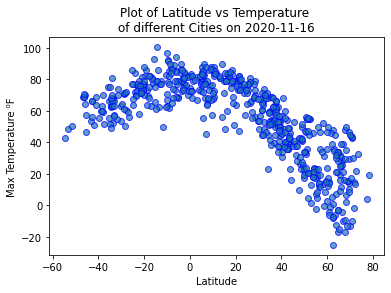

In [199]:
lat = clean_city_data['lat']
max_temp = clean_city_data['Max Temperature ⁰F']

plt.scatter(lat, max_temp, edgecolor="blue", marker = "o", alpha = 0.7, label = 'Cities')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature ⁰F")
plt.title(f'Plot of Latitude vs Temperature \nof different Cities on {datetime.fromtimestamp(clean_city_data.loc[1]["Date"]).strftime("%Y-%m-%d")}')
plt.show()

## Latitude vs. Humidity Plot

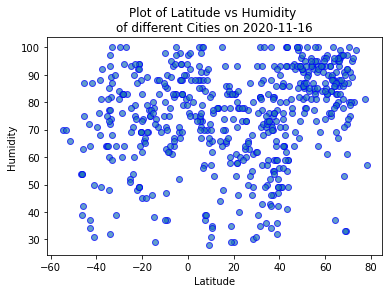

In [200]:
humidity = clean_city_data['Humidity']
plt.scatter(lat, humidity, edgecolor="blue", marker = "o", alpha = 0.7, label = 'Cities')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f'Plot of Latitude vs Humidity \nof different Cities on {datetime.fromtimestamp(clean_city_data.loc[1]["Date"]).strftime("%Y-%m-%d")}')
plt.show()

## Latitude vs. Cloudiness Plot

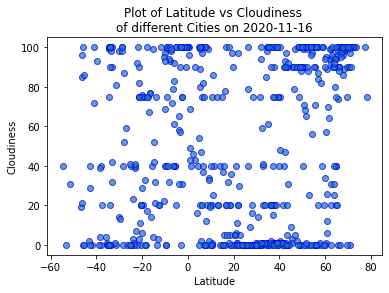

In [202]:
cloudiness = clean_city_data['Cloudiness']
plt.scatter(lat, cloudiness, edgecolor="blue", marker = "o", alpha = 0.7, label = 'Cities')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f'Plot of Latitude vs Cloudiness \nof different Cities on {datetime.fromtimestamp(clean_city_data.loc[1]["Date"]).strftime("%Y-%m-%d")}')
plt.show()

## Latitude vs. Wind Speed Plot

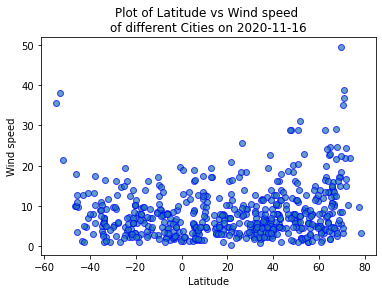

In [203]:
wind = clean_city_data['Wind speed']
plt.scatter(lat, wind, edgecolor="blue", marker = "o", alpha = 0.7, label = 'Cities')
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.title(f'Plot of Latitude vs Wind speed \nof different Cities on {datetime.fromtimestamp(clean_city_data.loc[1]["Date"]).strftime("%Y-%m-%d")}')
plt.show()

## Linear Regression

The r-squared is: 0.7122253000717117


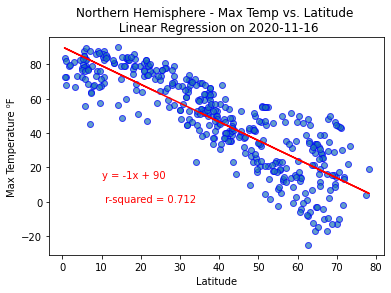

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

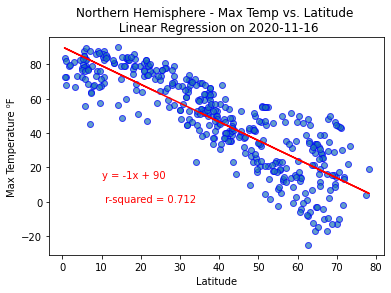

In [213]:
lat_north = clean_city_data['lat'].loc[clean_city_data['lat'] >= 0]
lat_south = clean_city_data['lat'].loc[clean_city_data['lat'] < 0]
max_temp_north = clean_city_data['Max Temperature ⁰F'].loc[clean_city_data['lat'] >= 0]
max_temp_south = clean_city_data['Max Temperature ⁰F'].loc[clean_city_data['lat'] < 0]

plt.scatter(lat_north, max_temp_north, edgecolor="blue", marker = "o", alpha = 0.7, label = 'Cities')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature ⁰F")
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude \n Linear Regression on {datetime.fromtimestamp(clean_city_data.loc[1]["Date"]).strftime("%Y-%m-%d")}')


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, max_temp_north)
#regress_values =  x_values *slope + intercept

regress_values = lat_north * (slope) + intercept
line_eq = "y = " + str(int(slope)) + "x + " + str(int(intercept))


plt.plot(lat_north, regress_values,"r-")
plt.annotate(f'{line_eq}\n\n r-squared = {round(rvalue**2,3)}',(10,0) ,fontsize=10, color="red")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

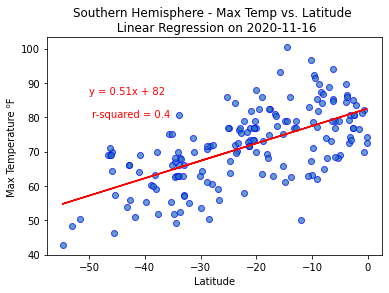

In [219]:
lat_north = clean_city_data['lat'].loc[clean_city_data['lat'] >= 0]
lat_south = clean_city_data['lat'].loc[clean_city_data['lat'] < 0]
max_temp_north = clean_city_data['Max Temperature ⁰F'].loc[clean_city_data['lat'] >= 0]
max_temp_south = clean_city_data['Max Temperature ⁰F'].loc[clean_city_data['lat'] < 0]

plt.scatter(lat_south, max_temp_south, edgecolor="blue", marker = "o", alpha = 0.7, label = 'Cities')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature ⁰F")
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude \n Linear Regression on {datetime.fromtimestamp(clean_city_data.loc[1]["Date"]).strftime("%Y-%m-%d")}')


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, max_temp_south)
#regress_values =  x_values *slope + intercept

regress_values = lat_south * (slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(int(intercept))


plt.plot(lat_south, regress_values,"r-")
plt.annotate(f'{line_eq}\n\n r-squared = {round(rvalue**2,3)}',(-50,80) ,fontsize=10, color="red")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


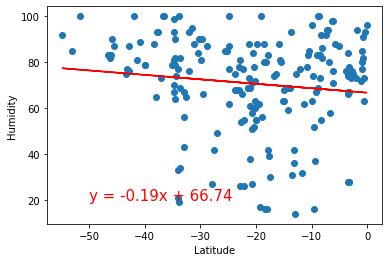

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


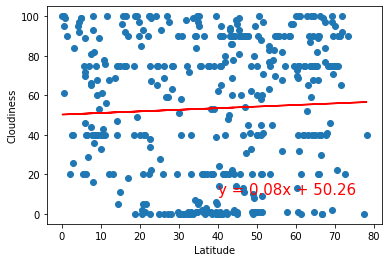

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


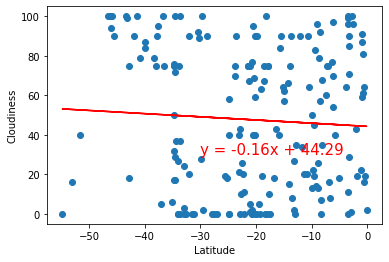

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


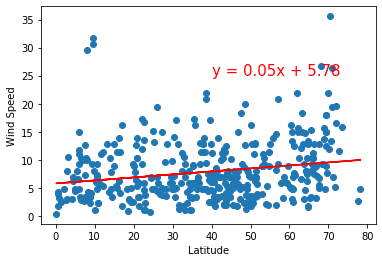

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


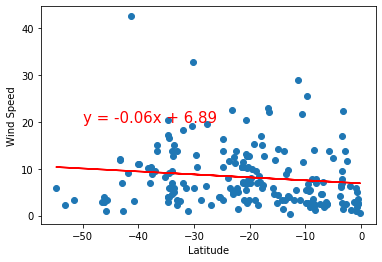